## Supervised Learning with scikit-learn

In [1]:
import pandas as pd

fname = 'data/train.csv'

data = pd.read_csv(fname)

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Using just one feature

In [3]:
data['IsFemale'] = (data['Sex'] == 'female')

samples = data[['IsFemale']]  # X
labels = data['Survived']  # y

#### Train/test split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    labels, 
                                                    train_size=0.6, 
                                                    random_state=0)

print("Samples: train={}, test={}".format(len(X_train), len(X_test)))

Samples: train=534, test=357


c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
X_train['IsFemale'].value_counts()

False    408
True     215
Name: IsFemale, dtype: int64

#### Dummy Classifier (most frequent class)

In [6]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train, y_train)

y_predicted = clf_dummy.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

print("Accuracy={}".format(accuracy_score(y_test, y_predicted)))

Accuracy=0.6268656716417911


#### Random forest classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

print("Accuracy={}".format(accuracy_score(y_test, y_predicted)))

Accuracy=0.7873134328358209


#### Using more features

In [9]:
samples = data[['IsFemale', 'Pclass']]
labels = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    labels, 
                                                    train_size=0.7, 
                                                    random_state=0)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

print("Accuracy={}".format(accuracy_score(y_test, y_predicted)))

Accuracy=0.7873134328358209


In [11]:
data['AgeSentinel'] = data['Age'].fillna(-100)

In [12]:
features = ['IsFemale', 'Pclass', 'AgeSentinel']
samples = data[features]
labels = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    labels, 
                                                    train_size=0.7, 
                                                    random_state=0)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

print("Accuracy={}".format(accuracy_score(y_test, y_predicted)))

Accuracy=0.7686567164179104


In [14]:
features = ['IsFemale', 'Pclass', 'AgeSentinel', 'Fare']
samples = data[features]
labels = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    labels, 
                                                    train_size=0.7, 
                                                    random_state=0)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

print("Accuracy={}".format(accuracy_score(y_test, y_predicted)))

Accuracy=0.8171641791044776


In [16]:
data['FamilySize'] = data['SibSp'] + data['Parch']

features = ['IsFemale', 'Pclass', 'AgeSentinel', 'Fare', 'FamilySize']

samples = data[features]
labels = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(samples,
                                                    labels, 
                                                    train_size=0.7, 
                                                    random_state=0)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

print("Accuracy={}".format(accuracy_score(y_test, y_predicted)))

Accuracy=0.8097014925373134


#### Feature importance

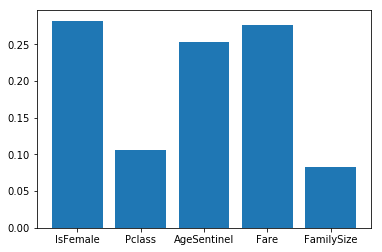

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(range(len(features)), clf.feature_importances_, tick_label=features)

plt.show()

#### What else? (Exercise)

- Different features?
- Different classifiers?